In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
#Lets read the data
df=pd.read_csv("...\Hospital appointment\data.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [61]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775120e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [62]:
#Time of first and last appointment in data
df.AppointmentDay.min(),df.AppointmentDay.max()

('2016-04-29T00:00:00Z', '2016-06-08T00:00:00Z')

In [63]:
df.shape

(110527, 14)

In [64]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [66]:
#Dropping rows with age less than zero
df=df[df['Age']>=0]
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172538e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438960e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [67]:
duplicates=df.duplicated()
print(duplicates)

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110526, dtype: bool


In [68]:
#Finding number of duplicated columns
duplicates.value_counts()

False    110526
dtype: int64

In [69]:
#changing some columns data types
df['PatientId']=df['PatientId'].astype('string')
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

In [70]:
#Checking to confirm data types changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  string             
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

In [71]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872500000000.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558998000000000.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262960000000.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951000000.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841190000000.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [72]:
#Calculating appointment waiting times
df['appointment_waiting_time']=df['AppointmentDay']-df['ScheduledDay']
df.appointment_waiting_time.head()

0   -1 days +05:21:52
1   -1 days +07:51:33
2   -1 days +07:40:56
3   -1 days +06:30:29
4   -1 days +07:52:37
Name: appointment_waiting_time, dtype: timedelta64[ns]

In [73]:
#Converting all waiting times to absolute days
df['appointment_waiting_time']=df['appointment_waiting_time'].abs().dt.days

In [74]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [75]:
#Finding Percentage of no-show and attended
df['No-show'].value_counts(normalize=True)

No     0.798066
Yes    0.201934
Name: No-show, dtype: float64

### There are higher percentage of no-show to those who attended. This is potentially are bad thing for the medical facility since most patients do not honor their appointments.

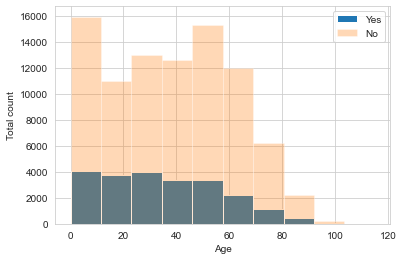

In [76]:
#Checking the age group where there are no show for the appointment
df[df['No-show']=="Yes"]["Age"].hist(alpha=1)
df[df['No-show']=="No"]["Age"].hist(alpha=0.3)
plt.legend(["Yes","No"])
plt.xlabel('Age')
plt.ylabel('Total count')
plt.show()

It could be seen from the above that, the no show decreases as the person ages.
Also, no show  is higher when the patient is young. It could potentially mean the parents/guardian  are not having much time to take the kids to their appointments.

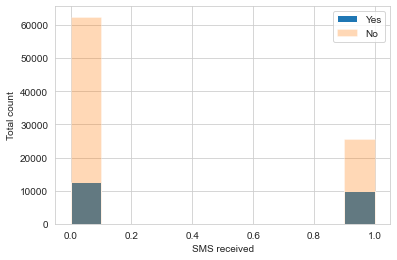

In [77]:
#Checking sms received as against no-show
df[df['No-show']=="Yes"]["SMS_received"].hist(alpha=1)
df[df['No-show']=="No"]['SMS_received'].hist(alpha=0.3)
plt.legend(["Yes","No"])
plt.xlabel('SMS received')
plt.ylabel('Total count')
plt.show()

From the graph above, it does not give us any indication that receiving sms helps in patient going for appointments.

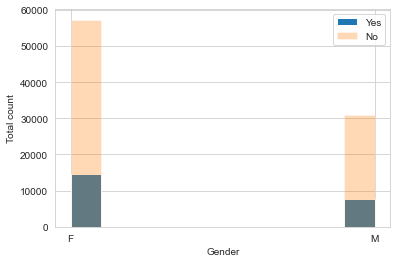

In [78]:
df[df['No-show']=="Yes"]["Gender"].hist(alpha=1)
df[df['No-show']=="No"]['Gender'].hist(alpha=0.3)
plt.legend(["Yes","No"])
plt.xlabel('Gender')
plt.ylabel('Total count')
plt.show()

From the above, it shows the women had the greater proportion of patients. It could be assumed that, women tend to care more about their health than men.However, the proportion of men showing up for their appointment was higher than women.

In [79]:
#Replacing yes wtih 1 and no with 0 on No-show column
df2=df.replace({'No-show':{'Yes':1,'No':0}})
display(df2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,appointment_waiting_time
0,29872500000000.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,558998000000000.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,4262960000000.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,867951000000.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,8841190000000.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572130000000.0,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0,34
110523,3596270000000.0,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0,34
110524,15576600000000.0,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0,40
110525,92134900000000.0,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0,40


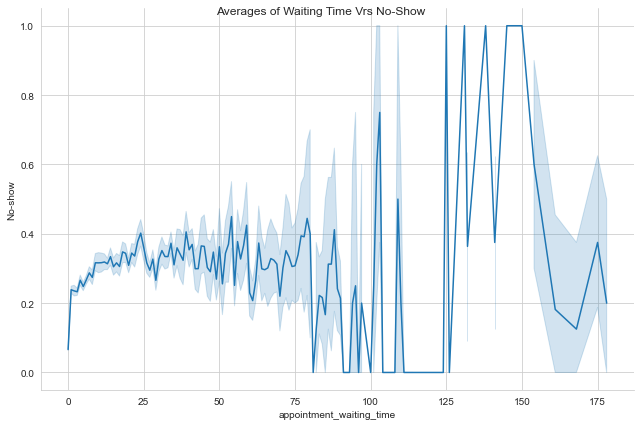

In [80]:
#Checking the average waiting times as agains no show
sns.set_style("whitegrid")
g=sns.relplot(x='appointment_waiting_time',y='No-show',height=6,aspect=1.5,data=df2,kind='line')

g.fig.suptitle("Averages of Waiting Time Vrs No-Show")
              
plt.show()

The above shows that no showing increases when the appointment waiting time becomes too much. It starts to decline after 150days of waiting time.
Also, the no show is very low when appointment days is within the first 50 days. It could potentially mean they are sicknesses that need immediate attention. eg is 0days .

In [82]:
df4=df2.groupby(["Neighbourhood",'No-show'])['No-show'].count().unstack().fillna(0).reset_index()
df4.columns=['Neighbourhood','Not_attended','attended']
df4.set_index('Neighbourhood')
df4

,Neighbourhood,Not_attended,attended
0,AEROPORTO,7.0,1.0
1,ANDORINHAS,1741.0,521.0
2,ANTÔNIO HONÓRIO,221.0,50.0
3,ARIOVALDO FAVALESSA,220.0,62.0
4,BARRO VERMELHO,332.0,91.0
...,...,...,...
76,SÃO JOSÉ,1549.0,428.0
77,SÃO PEDRO,1933.0,515.0
78,TABUAZEIRO,2559.0,573.0
79,UNIVERSITÁRIO,120.0,32.0


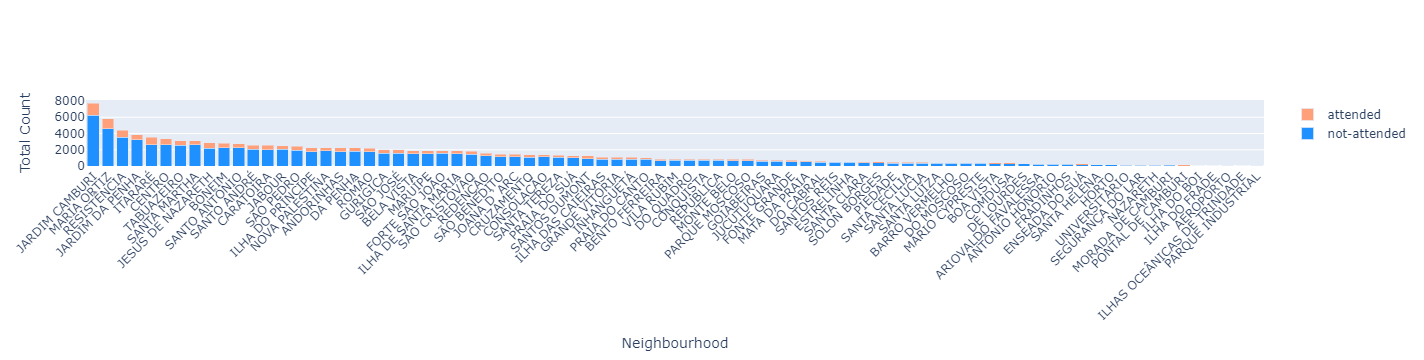

In [83]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x=df4.Neighbourhood,
    y=df4.Not_attended,
    name='not-attended',
    marker_color='dodgerblue'
))


fig.add_trace(go.Bar(
    x=df4.Neighbourhood,
    y=df4.attended,
    name='attended',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='stack', xaxis_tickangle=-45,
                  xaxis_title="Neighbourhood",yaxis_title="Total Count",
                  xaxis={'categoryorder':'total descending'})
fig.show()

This shows as Jardim Camburi is the most populated area in the state.
We will soon find out the ratio of attended to not attended based on state.

In [84]:
df4['sum']=df4['Not_attended']+df4['attended']
df4['ratio']=df4['Not_attended']/df4['sum']
df4

,Neighbourhood,Not_attended,attended,sum,ratio
0,AEROPORTO,7.0,1.0,8.0,0.875000
1,ANDORINHAS,1741.0,521.0,2262.0,0.769673
2,ANTÔNIO HONÓRIO,221.0,50.0,271.0,0.815498
3,ARIOVALDO FAVALESSA,220.0,62.0,282.0,0.780142
4,BARRO VERMELHO,332.0,91.0,423.0,0.784870
...,...,...,...,...,...
76,SÃO JOSÉ,1549.0,428.0,1977.0,0.783510
77,SÃO PEDRO,1933.0,515.0,2448.0,0.789624
78,TABUAZEIRO,2559.0,573.0,3132.0,0.817050
79,UNIVERSITÁRIO,120.0,32.0,152.0,0.789474


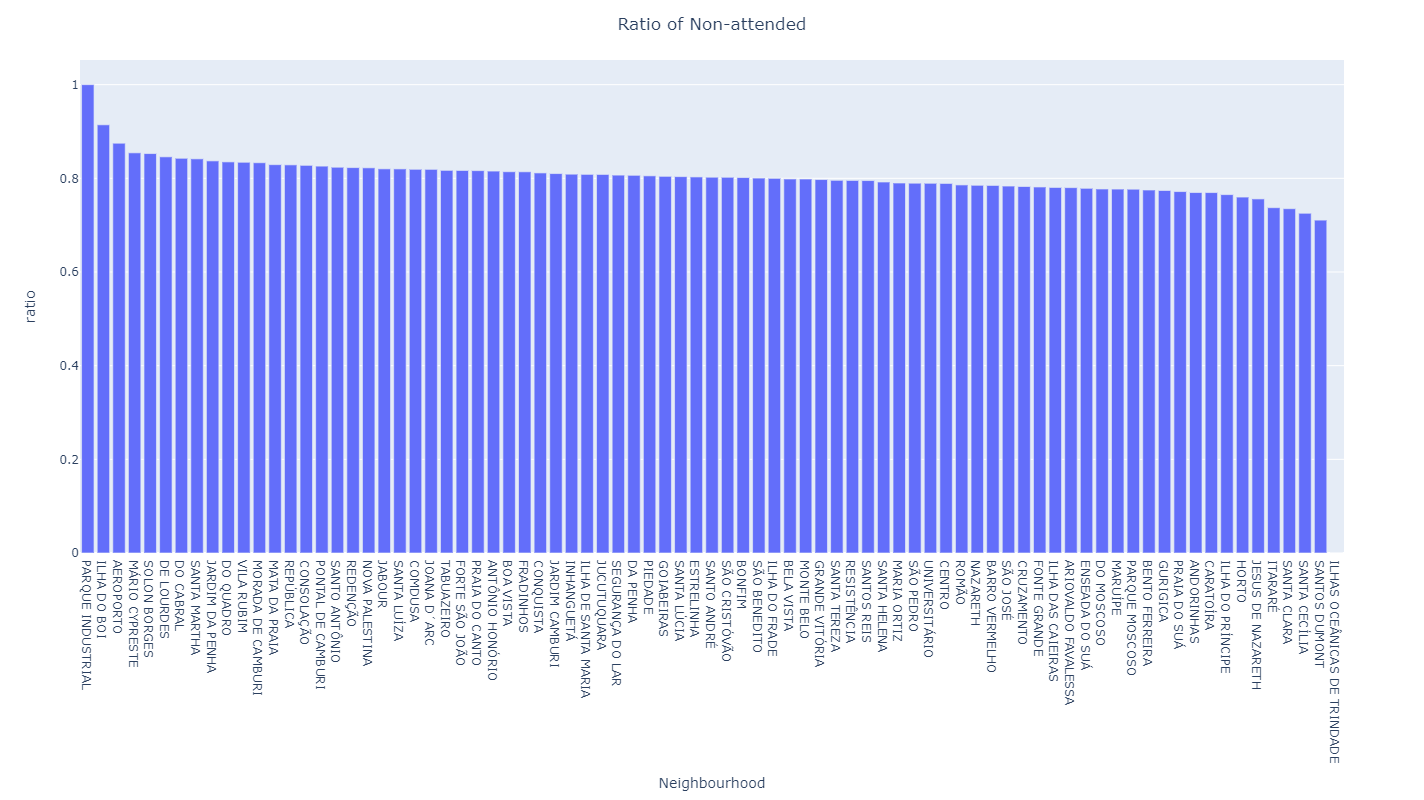

In [87]:
import plotly.express as px
fd=df4.sort_values(by='ratio',ascending=False)
fig=px.bar(fd,x='Neighbourhood',y='ratio',width=1400,height=800)

fig.update_layout(title_text='Ratio of Non-attended',
                 title_x=0.5)
             
                
fig.show()


From the above, it can be concluded that Parque industrial Neighbourhood is likely not to attend an appointment. Moreover we need to see how many people from this neighbourhood to make a genuine conclusion 

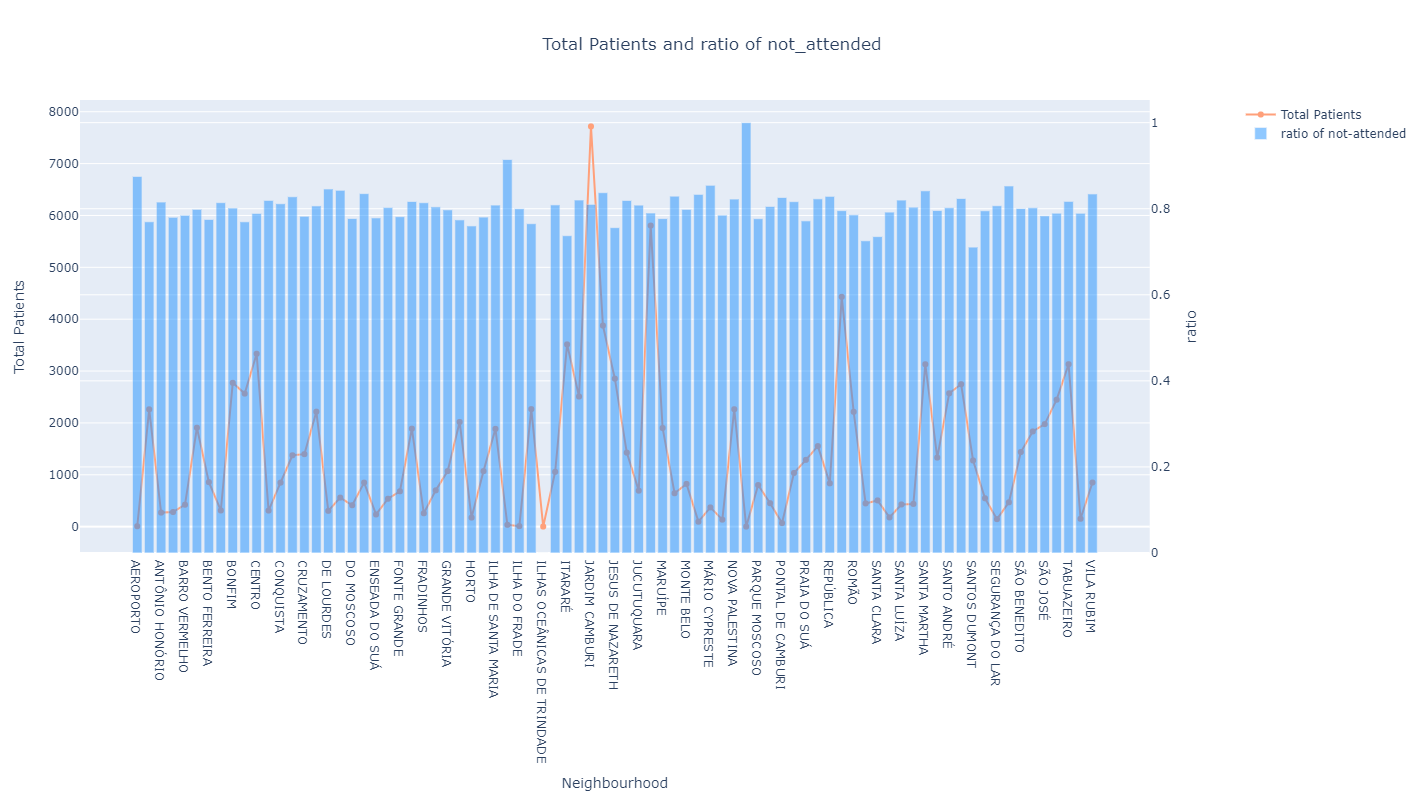

In [89]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fd=df4.sort_values(by='sum',ascending=False)

fig1=make_subplots(specs=[[{"secondary_y":True}]])


fig1.add_trace(go.Scatter(
    x=df4['Neighbourhood'],
    y=df4['sum'],
    name='Total Patients',
    mode='lines+markers',marker_color='lightsalmon',opacity=1),
    secondary_y=False,
)
        
fig1.add_trace(go.Bar(
    x=df4['Neighbourhood'],
    y=df4['ratio'],
    name='ratio of not-attended',
    marker_color='dodgerblue',opacity=0.5),
    secondary_y=True
)

fig1.update_layout(title_text ='Total Patients and ratio of not_attended',title_x=0.5,autosize=False,width=1500,height=800)
fig1.update_xaxes(title_text="Neighbourhood")
            
fig1.update_yaxes(title_text='Total Patients',secondary_y=False)
fig1.update_yaxes(title_text='ratio',secondary_y=True)                 
                                     
                
fig1.show()